In [18]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import cv2
from PIL import Image
import pylab

# Add the path to the src folder to the python path
sys.path.append(os.path.abspath("../src"))
from optimizer import (
    FistaBT,
    FistaMod,
    GreedyFISTA,
    RestartingFISTA,
    OptimizationParams,
)

from problems import tv_problem_2d

import visualization as vis

In [20]:
def load_grayscale_image(path, size=None):
    """Load an image and convert to grayscale numpy array with values in [0,1].
    ↪"""
    img = Image.open(path).convert("L")
    if size:
        img = img.resize(size)
    return np.array(img, dtype=np.float32) / 255.0

In [21]:
def imageplot(f, str="", sbpt=[]):
    """
    Use nearest neighbor interpolation for the display.
    """
    if sbpt != []:
        plt.subplot(sbpt[0], sbpt[1], sbpt[2])
    imgplot = plt.imshow(f, interpolation="nearest", vmin=0, vmax=1)
    imgplot.set_cmap("gray")
    pylab.axis("off")
    if str != "":
        plt.title(str)

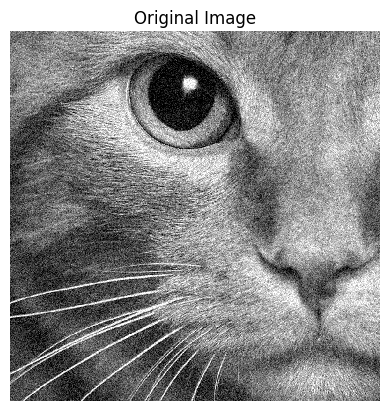

In [22]:
img = load_grayscale_image("../data/cat_noise.png")
imageplot(img, "Original Image", [1, 1, 1])
plt.show()

In [44]:
dim = img.shape  # Dimension of the problem
mu = 10  # Regularization parameter
gamma = 0.001  # Step size
x0 = np.random.randn(img.shape[0], img.shape[1])

params = OptimizationParams(
    dim=dim,
    mu=mu,
    gamma=gamma,
    x0=x0,
    verbose=False,
)
print(x0)

[[ 0.8447952  -1.57241076  1.92301646 ...  0.51404377  0.26280986
  -0.10265922]
 [-2.54113452  2.01053483  1.17953465 ...  0.06831428 -1.00608426
   0.27441278]
 [-1.38683954 -0.11615472 -2.20781778 ...  0.36157097  0.16251346
  -0.45992303]
 ...
 [-0.51906058  0.0905771   0.21070903 ...  0.70692796  1.45240065
   1.11334939]
 [-0.36552068  0.33874528  1.87153777 ...  1.21652492 -1.05926859
   0.06882353]
 [ 1.2805552   1.50540912  0.37994883 ...  0.48706297 -0.87312683
  -1.20230109]]


In [45]:
tv_problem = tv_problem_2d(img)

# FISTA-BT


In [39]:
fista_bt = FistaBT(params)

In [40]:
x, history = fista_bt.optimize(*tv_problem)
print(f"Optimal point: {x}")

  0%|          | 0/5000 [00:00<?, ?it/s]

 60%|█████▉    | 2996/5000 [01:03<00:45, 44.17it/s]/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
 61%|██████    | 3036/5000 [01:04<00:42, 45.72it/s]/Users/ilyes/Documents/CS/3A/SDI/OVO/FISTA_Variants/src/problems.py:74: RuntimeWarning: overflow encountered in square
  return 0.5 * np.sum((x - b) ** 2) + tv_term
100%|██████████| 5000/5000 [01:45<00:00, 47.21it/s]

Optimal point: [[-5.15815070e+253  5.41355531e+255 -8.19329697e+254 ...  1.20454478e+156
   1.20454478e+156  1.20454478e+156]
 [ 5.09689062e+255 -7.58112272e+254 -5.63183579e+255 ... -8.73043140e+155
  -8.73043140e+155 -8.73043140e+155]
 [-6.98723086e+254 -5.31330543e+255  1.55493594e+255 ... -1.01011732e+156
  -1.01011732e+156 -1.01011732e+156]
 ...
 [-1.32165635e+156  4.89062181e+155  1.19812298e+156 ...  2.88909325e-001
   2.37348168e-001  1.72887594e-001]
 [-1.32165635e+156  4.89062181e+155  1.19812298e+156 ...  3.79785189e-001
   2.04766698e-001  1.63996454e-001]
 [-1.32165635e+156  4.89062181e+155  1.19812298e+156 ...  4.33998665e-001
   2.85249784e-001  2.47058824e-001]]


/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/matplotlib/scale.py:253: RuntimeWarning: overflow encountered in power
  return np.power(self.base, a)


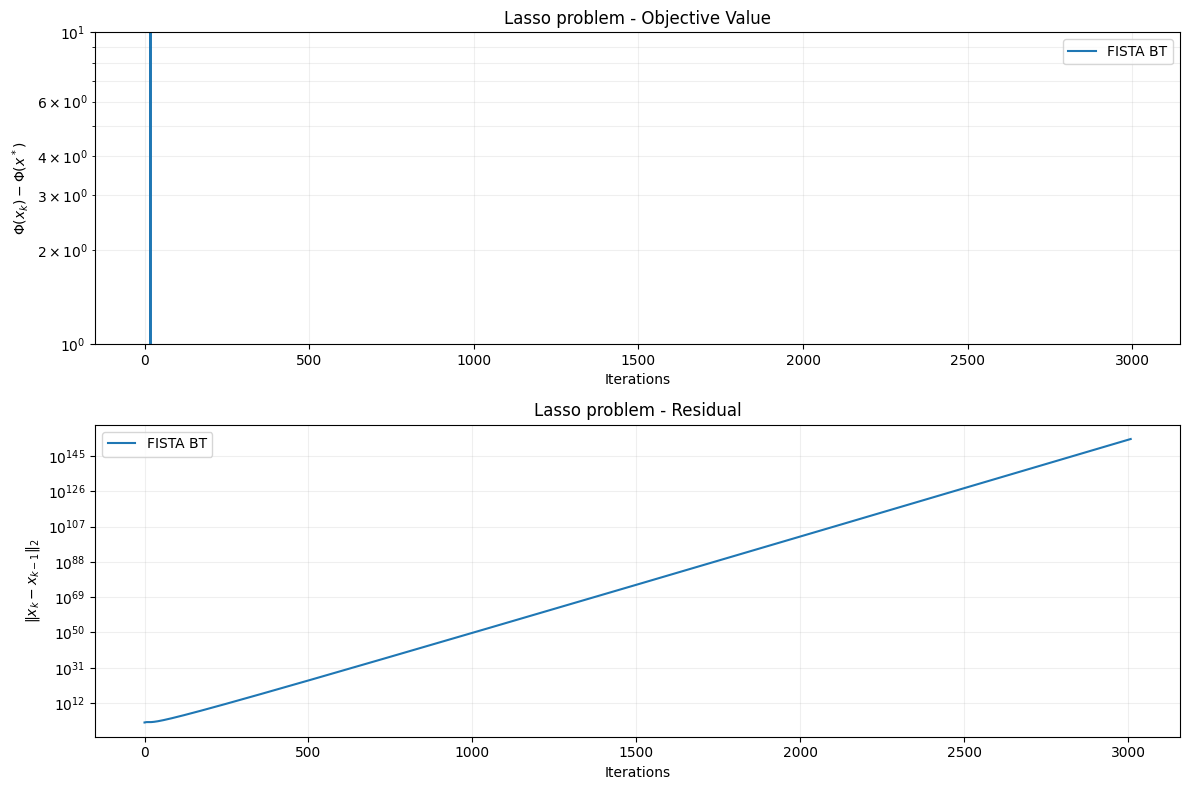

In [41]:
vis.plot_convergence([history], labels=["FISTA BT"], title="Lasso problem")

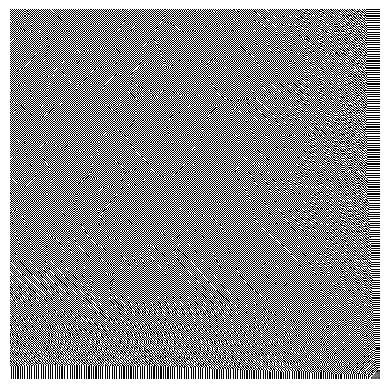

In [42]:
imageplot(x)

# FISTA-Mod


In [48]:
fista_mod = FistaMod(params)

In [49]:
x, history = fista_mod.optimize(*tv_problem)

 58%|█████▊    | 2907/5000 [3:36:52<00:46, 44.81it/s]       /opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
 59%|█████▉    | 2941/5000 [3:36:53<00:39, 52.71it/s]/Users/ilyes/Documents/CS/3A/SDI/OVO/FISTA_Variants/src/problems.py:74: RuntimeWarning: overflow encountered in square
  return 0.5 * np.sum((x - b) ** 2) + tv_term
100%|██████████| 5000/5000 [3:37:32<00:00,  2.61s/it]


/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/matplotlib/scale.py:253: RuntimeWarning: overflow encountered in power
  return np.power(self.base, a)


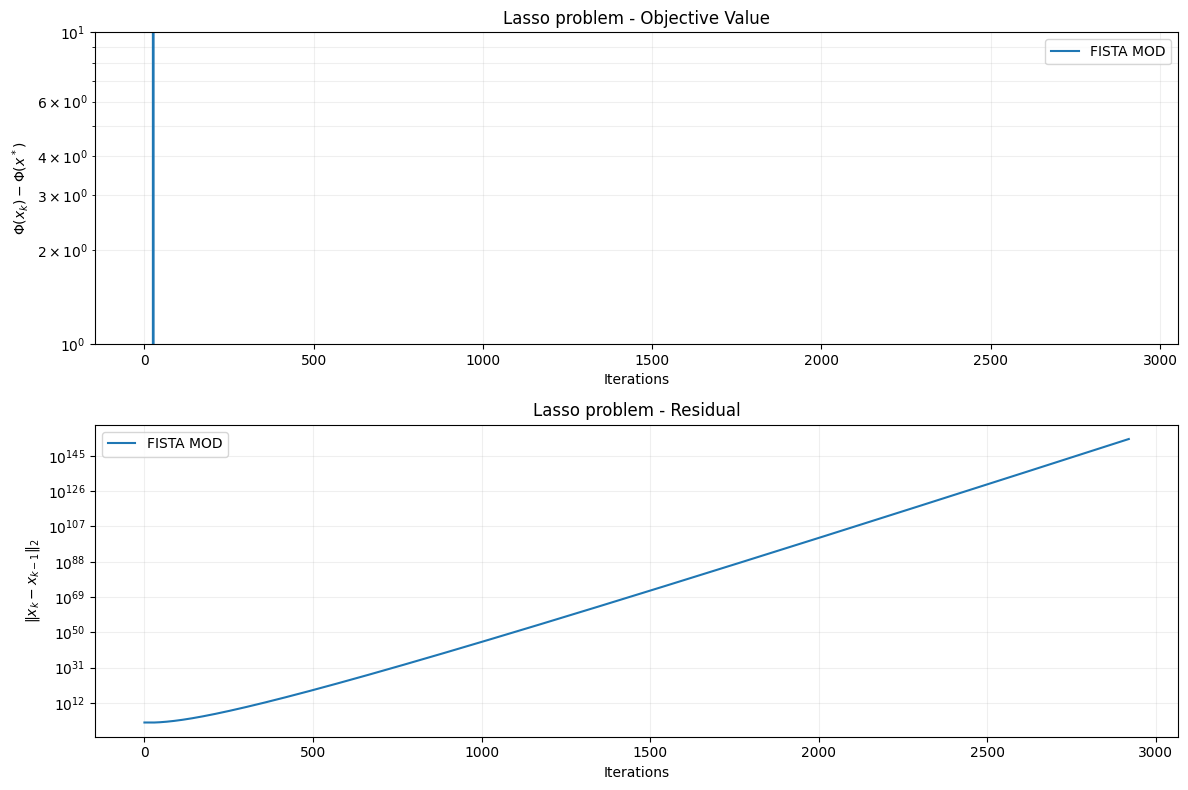

In [50]:
vis.plot_convergence([history], labels=["FISTA MOD"], title="Lasso problem")

# Greedy FISTA


In [17]:
fista_greedy = GreedyFISTA(params)

In [18]:
x, history = fista_greedy.optimize(*lasso)

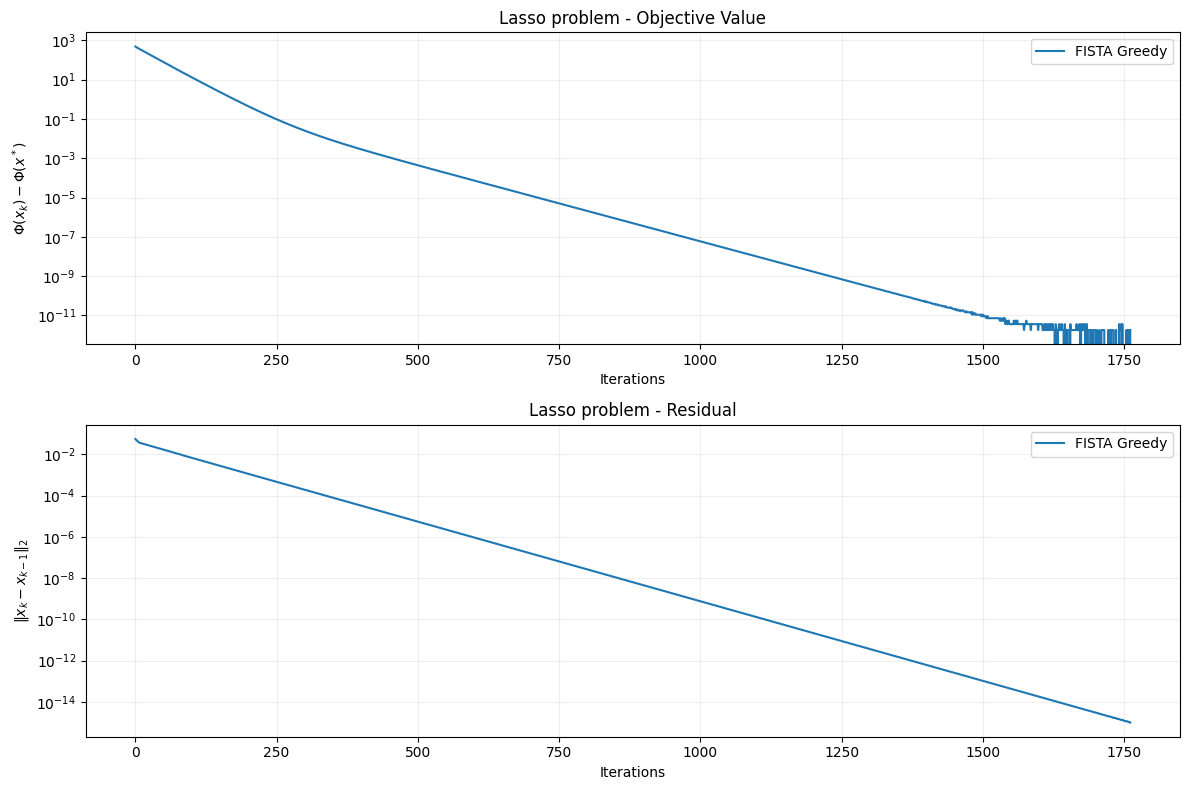

In [19]:
vis.plot_convergence([history], labels=["FISTA Greedy"], title="Lasso problem")

# FISTA Restarting


In [20]:
fista_restart = RestartingFISTA(params)

In [21]:
x, history = fista_restart.optimize(*lasso)

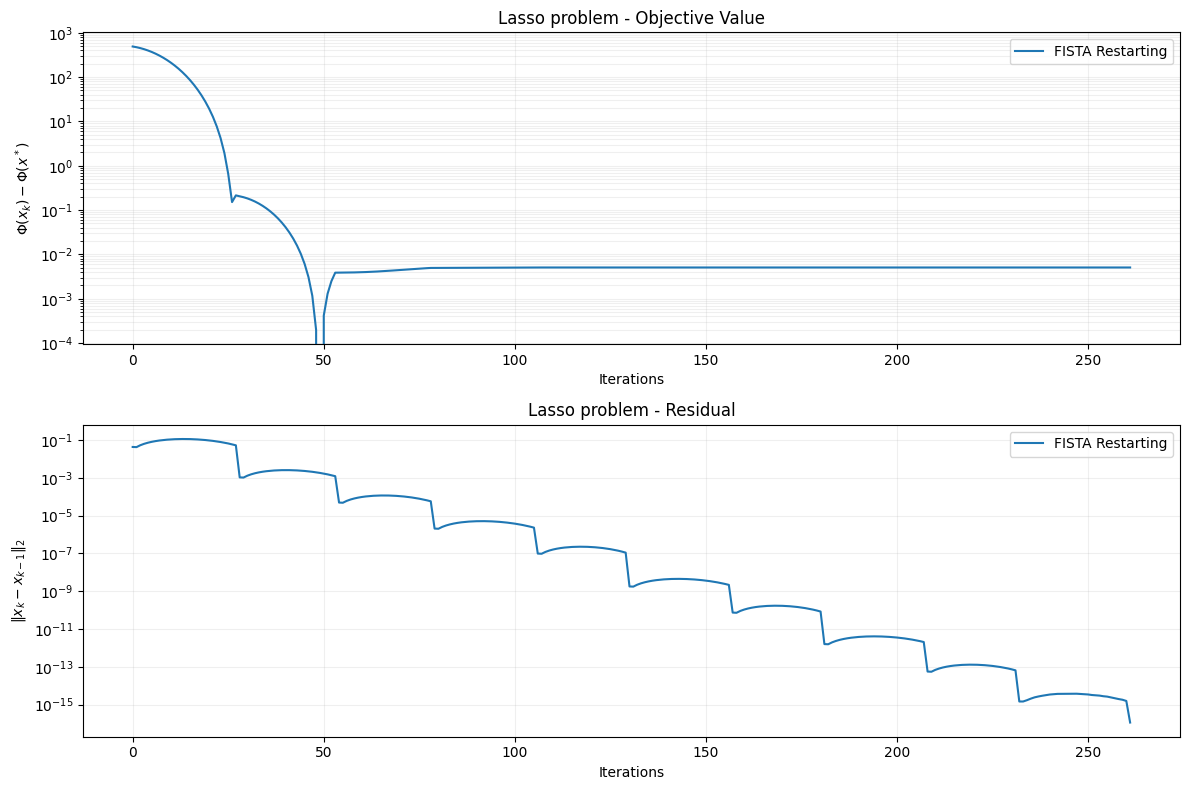

In [22]:
vis.plot_convergence([history], labels=["FISTA Restarting"], title="Lasso problem")